
[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.1 to 6.283185307179586
Input range: From -34.55751918948772 to 34.55751918948772
Generated 1000000 cartesian products in total
     Series1   Series2  Series3  Label
0 -34.557519 -3.141593      0.1    0.0
1 -33.147008 -3.141593      0.1    0.0
2 -31.736497 -3.141593      0.1    0.0
3 -30.325986 -3.141593      0.1    0.0
4 -28.915475 -3.141593      0.1    0.0


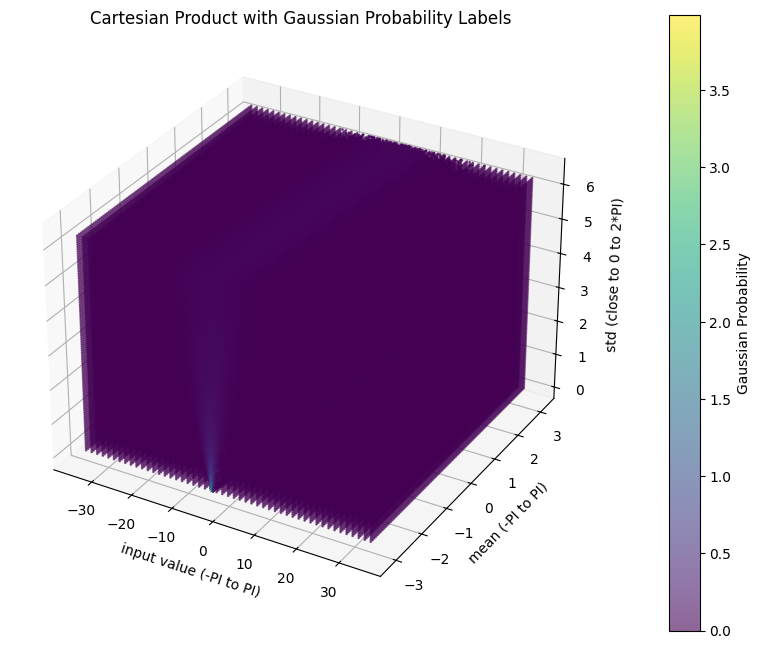

In [ ]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100


# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.1
std = np.linspace(small_number, 2*np.pi, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-np.pi, np.pi, num_values)

# We add a minimum input value and maximum input value based on the smallest and highest mean and the maximum std values
min_input = mean.min() - 5 * std.max()
max_input = mean.max() + 5 * std.max()

print(f"Input range: From {min_input} to {max_input}")

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Linearly spaced values from min_input to max_input for 50% of the values
    samples = np.linspace(min_input, max_input, int(num_values * 0.5))
    
    # Add samples with a normal distribution around the mean for the remaining 50% of the values
    normal_samples = np.random.normal(m, s, int(num_values * 0.5))
    samples = np.concatenate((samples, normal_samples))
    
    inputval.extend(samples)
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [3]:
labels.describe()

count    1.000000e+06
mean     1.084894e-01
std      2.992533e-01
min      0.000000e+00
25%      2.419263e-08
50%      3.674243e-02
75%      9.497086e-02
max      3.989423e+00
Name: Label, dtype: float64

In [4]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.93)

np.float64(0.3067325856306204)

(array([5.10698e+05, 1.86585e+05, 1.08477e+05, 5.19070e+04, 3.04650e+04,
        2.02190e+04, 1.40670e+04, 1.04920e+04, 8.18500e+03, 6.48200e+03,
        5.81200e+03, 4.32400e+03, 3.64400e+03, 3.30600e+03, 2.57000e+03,
        2.29700e+03, 2.36100e+03, 1.54000e+03, 2.06500e+03, 1.15900e+03,
        1.71300e+03, 1.15400e+03, 9.11000e+02, 1.21600e+03, 1.11200e+03,
        6.14000e+02, 6.72000e+02, 8.46000e+02, 1.23400e+03, 3.83000e+02,
        4.14000e+02, 4.53000e+02, 5.05000e+02, 5.96000e+02, 1.09500e+03,
        1.99000e+02, 2.25000e+02, 2.39000e+02, 2.65000e+02, 2.85000e+02,
        3.26000e+02, 3.72000e+02, 3.77000e+02, 5.57000e+02, 7.05000e+02,
        1.30000e+02, 1.18000e+02, 1.18000e+02, 1.15000e+02, 1.30000e+02,
        1.49000e+02, 1.14000e+02, 1.43000e+02, 1.56000e+02, 1.74000e+02,
        1.86000e+02, 1.90000e+02, 2.16000e+02, 2.47000e+02, 3.16000e+02,
        3.96000e+02, 5.98000e+02, 4.90000e+01, 4.50000e+01, 3.60000e+01,
        4.40000e+01, 4.10000e+01, 4.90000e+01, 3.40

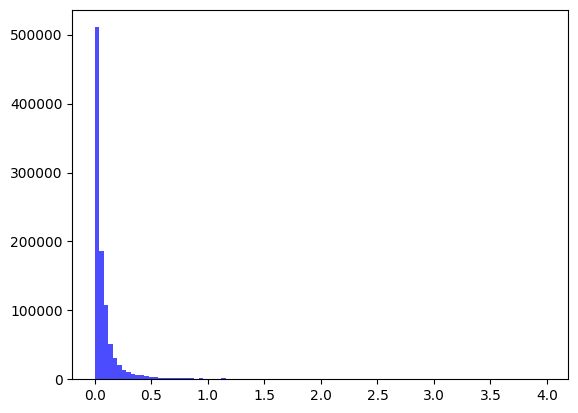

In [5]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [6]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.22111124770293308)

In [7]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [8]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_data_min_max_input_half_lin_half_normal.csv")
test_file = os.path.join(output_folder, "test_data_min_max_input_half_lin_half_normal.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl (43.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Train dataset saved to ./train_data_min_max_input_half_lin_half_normal.csv
Test dataset saved to ./test_data_min_max_input_half_lin_half_normal.csv


In [9]:
train_df["Label"].describe()

count    8.000000e+05
mean     1.084585e-01
std      2.990358e-01
min      0.000000e+00
25%      2.457445e-08
50%      3.676234e-02
75%      9.497431e-02
max      3.989423e+00
Name: Label, dtype: float64

In [10]:
test_df["Label"].describe()

count    2.000000e+05
mean     1.086131e-01
std      3.001227e-01
min      0.000000e+00
25%      2.247868e-08
50%      3.664592e-02
75%      9.494516e-02
max      3.989422e+00
Name: Label, dtype: float64

In [11]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 13701
Non-outlier observations: 786299
count    7.862990e+05
mean     7.634298e-02
std      1.309278e-01
min      0.000000e+00
25%      1.423479e-08
50%      3.413535e-02
75%      9.067290e-02
max      1.005537e+00
dtype: float64


np.float64(0.03413534839676333)

In [12]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 20853
Non-outlier observations: 765446


In [13]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.654460e+05
mean     6.009319e-02
std      8.393476e-02
min      0.000000e+00
25%      5.942269e-09
50%      3.001168e-02
75%      8.493885e-02
max      4.691181e-01
dtype: float64

(array([314212.,  15904.,  12962.,  11873.,  11575.,  11514.,  11792.,
         12277.,  12694.,  13419.,  14423.,  15400.,  18043.,  23649.,
         22142.,  19247.,  16680.,  14829.,  13014.,  11711.,  10325.,
          9585.,   8772.,   7959.,   7299.,   6493.,   6233.,   5616.,
          5067.,   5042.,   4432.,   4429.,   3819.,   3696.,   3406.,
          3370.,   2988.,   2970.,   2858.,   2676.,   2525.,   2488.,
          2238.,   2159.,   2170.,   2137.,   1603.,   2013.,   1683.,
          1679.,   1523.,   1546.,   1517.,   1419.,   1291.,   1418.,
          1232.,   1443.,    946.,   1184.,   1176.,    956.,   1179.,
           867.,    888.,   1123.,    829.,    753.,    878.,    980.,
           662.,    772.,    857.,    824.,    577.,    608.,    762.,
           809.,    486.,    557.,    575.,    897.,    518.,    467.,
           499.,    550.,    665.,    628.,    404.,    433.,    445.,
           543.,    553.,    551.,    344.,    338.,    367.,    401.,
      

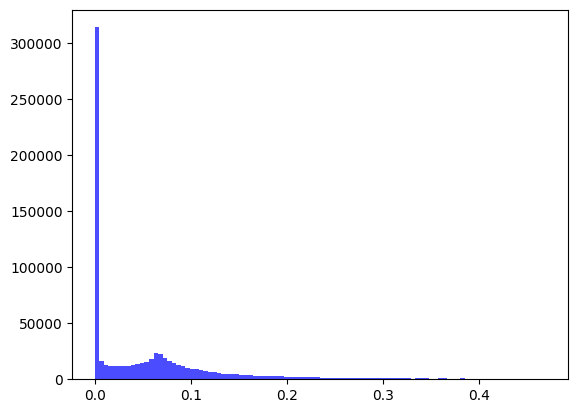

In [14]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')